In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import csv
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from tabulate import tabulate
from collections import Counter

In [2]:
# fixes a few miscodings
def RecodeAges2(ages):
    ages=np.core.defchararray.replace(ages, '20 years', '20years')  
    ages=np.core.defchararray.replace(ages, '10 years', '10years')  
    ages=np.core.defchararray.replace(ages, '0 years', '6 months')  
    ages=np.core.defchararray.replace(ages, '1 weeks', '1 week')      
    ages=np.core.defchararray.replace(ages, ' ', '')
    return ages 

In [3]:
# reduces to 6 features
def RecodeAges(ages):
    more3_yr = ['13years','14years','15years','16years','17years','18years','19years','20years','3years','4years','5years','6years','7years','8years','9years','10years','11years','12years']
    lessone_yr = ['3months','4months','5months','6months','7months','8months','9months','10months','11months','0years']
    lessone_mo = ['1day','2days','3days','4days','5days','6days']
    lessone_wk = ['1weeks','1week','2weeks','3weeks','4weeks']
    oneortwo_mo = ['1month','5weeks','2months']
    oneortwo_yr = ['1year','2years']
    
    ages=np.core.defchararray.replace(ages, ' ', '')
    
    for i in range(0, len(more3_yr)):
        ages=np.core.defchararray.replace(ages, more3_yr[i], 'more3yr')        
    for i in range(0, len(lessone_yr)):
        ages=np.core.defchararray.replace(ages, lessone_yr[i], 'lessthan1yr')
    for i in range(0, len(lessone_mo)):
        ages=np.core.defchararray.replace(ages, lessone_mo[i], 'lessthan1mo')
    for i in range(0, len(lessone_wk)):
        ages=np.core.defchararray.replace(ages, lessone_wk[i], 'lessthan1wk')
    for i in range(0, len(oneortwo_mo)):
        ages=np.core.defchararray.replace(ages, oneortwo_mo[i], '1or2mo')
    for i in range(0, len(oneortwo_yr)):
        ages=np.core.defchararray.replace(ages, oneortwo_yr[i], '1or2yr')
    return ages

In [4]:
train= np.loadtxt(open('c:/shelter_train.csv'),delimiter=",",skiprows=0, dtype='string')
test= np.loadtxt(open('c:/shelter_test.csv'),delimiter=",",skiprows=0, dtype='string')
#remove header
train=np.delete(train, 0, 0)
test = np.delete(test, 0, 0)
#isolate age and label columns
train_ages = train[:, 7]
train_ages2 = train[:, 7]
labels=train[:,3]
unique_outcomes = np.unique(labels)
print 'Outcome types', unique_outcomes

Outcome types ['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


In [5]:
#Reduce ages to 6 features*********************
ages=RecodeAges(train_ages)
print np.unique(ages, return_counts=True)
#*****************************
split = ages.shape[0] // 20
traindata, trainlab = ages[split:], labels[split:]
devdata, devlab = ages[:split], labels[:split]

(array(['', '1or2mo', '1or2yr', 'lessthan1mo', 'lessthan1wk', 'lessthan1yr',
       'more3yr'], 
      dtype='|S11'), array([  18, 4689, 7711,  398, 1839, 4964, 7110], dtype=int64))


log loss 1.079
score 0.504


<function matplotlib.pyplot.show>

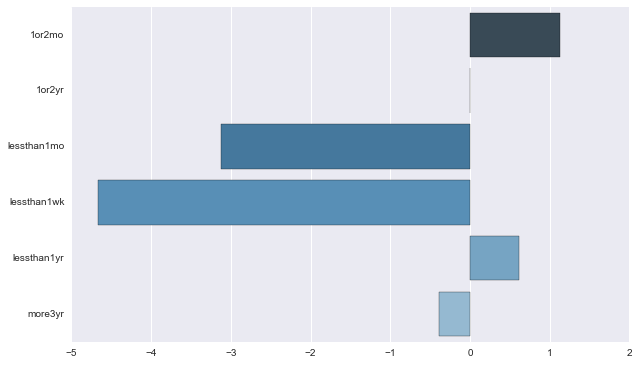

In [6]:
clf = CountVectorizer()
traintransformed = clf.fit_transform(traindata)
devtransformed = clf.transform(devdata)
#*****************************
logr = LogisticRegression(penalty='l1', C=0.1)
logr.fit(traintransformed, trainlab)
preds = logr.predict_proba(devtransformed)
print 'log loss %.3f' % log_loss(devlab, preds)  
print 'score %.3f' % logr.score(devtransformed, devlab)
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.barplot(y=clf.get_feature_names(), x=logr.coef_[0], palette='Blues_d', orient = 'h')
plt.show

In [7]:
# Only remove a few miscodings*********************
ages=RecodeAges2(train_ages2)
#*****************************
split = ages.shape[0] // 20
traindata, trainlab = ages[split:], labels[split:]
devdata, devlab = ages[:split], labels[:split]

log loss 1.063
score 0.517


<function matplotlib.pyplot.show>

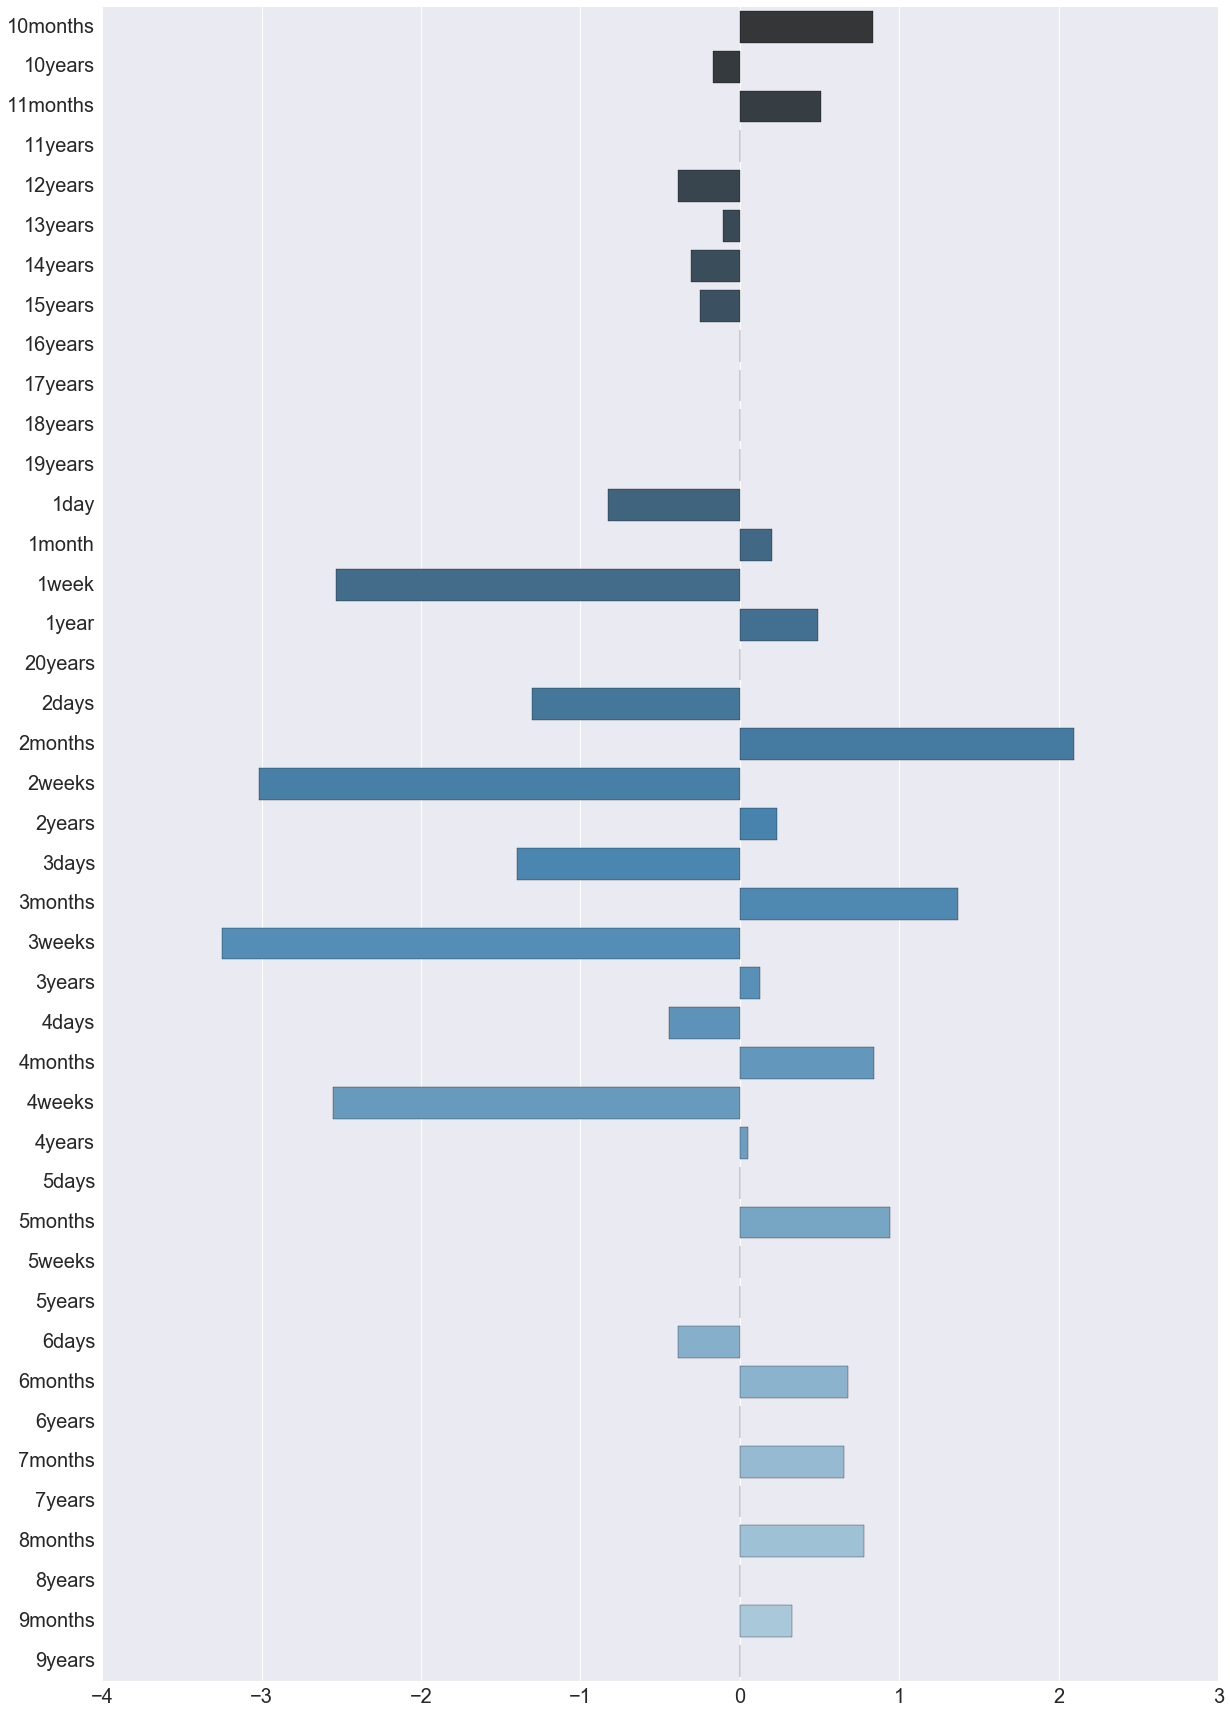

In [8]:
clf = CountVectorizer()
traintransformed = clf.fit_transform(traindata)
devtransformed = clf.transform(devdata)
#*****************************
logr = LogisticRegression(penalty='l1', C=0.1)
logr.fit(traintransformed, trainlab)
preds = logr.predict_proba(devtransformed)
print 'log loss %.3f' % log_loss(devlab, preds)  
print 'score %.3f' % logr.score(devtransformed, devlab)
plt.figure(figsize=(20,30))
sns.set(font_scale=2)
sns.barplot(y=clf.get_feature_names(), x=logr.coef_[0], palette='Blues_d', orient = 'h')
plt.show